In [4]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

import statsmodels.api as sm
import statsmodels.formula.api as smf

In [41]:
listings=pd.read_csv('D:\MASTER_ENC\mini_memoire/res_tactiques2/listings_zsc_tactics8.csv', sep=',', on_bad_lines='skip', encoding='utf-8')

C:\Users\123\AppData\Local\Temp\ipykernel_18836\4144157163.py:1: DtypeWarning: Columns (63,64) have mixed types. Specify dtype option on import or set low_memory=False.
  listings=pd.read_csv('D:\MASTER_ENC\mini_memoire/res_tactiques2/listings_zsc_tactics8.csv', sep=',', on_bad_lines='skip', encoding='utf-8')


In [6]:
cols_labels=['open to different cultures', 'cosmopolitan', 'international view','cultural exchange',
                       'personal life', 'life experiences','divers interests', 'hobbies', 'enjoy life', 
                    'meet new people', 'welcoming', 'friendly', 'sociable', 'interpersonal interaction',
                     'thoughtful service', 'attentive to needs', 'willing to help','responsive', 
                     'fan of Airbnb', 'Airbnb community', 'love Airbnb','travel with Airbnb']
cols_tactics=['openness', 'authenticity','sociability', 'self_promotion', 'exemplification']

labels2tac={
    "openness":['open to different cultures','cosmopolitan','international view','cultural exchange'], 
    "authenticity":['personal life','life experiences','divers interests','hobbies','enjoy life'], 
    'sociability':['meet new people', 'welcoming', 'friendly','sociable', 'interpersonal interaction',],
    'self_promotion':['thoughtful service', 'attentive to needs','willing to help','responsive'],
    'exemplification':["fan of Airbnb","Airbnb community",'love Airbnb', 'travel with Airbnb']    
}    

## prétraitement des data:

In [42]:
listings['langue']=listings['langue'].fillna("vide")
# print(listings.langue.value_counts()/len(listings))#55 NAN

listings['langue_']=listings['langue'].apply(lambda x : x if x=='fr' or  x=='en' or x=='vide' else "other_lang")
print(listings.langue_.value_counts()/len(listings),'\n')

langue_
vide          0.550819
fr            0.249095
en            0.184795
other_lang    0.015292
Name: count, dtype: float64 



# VIF :

In [43]:
from statsmodels.tools.tools import add_constant
from statsmodels.stats.outliers_influence import variance_inflation_factor
from patsy import dmatrices


formula=('booking_rate_l30d ~ C(langue_) + C(host_is_superhost) + C(professional_host) +'
' yrs_experience + C(host_identity_verified)+ C(host_has_profile_pic) +host_response_rate +'
' availability_30 + price_ + review_scores_rating + '
'C(host_location_category) + C(property_type_) + beds +bathrooms+ C(instant_bookable) + '
'len + openness +authenticity + sociability + self_promotion + exemplification ')

y, X = dmatrices(formula, data=listings, return_type='dataframe')
vif_df = pd.DataFrame()
vif_df['Variables']=X.columns
vif_df["VIF"] = [variance_inflation_factor(X.values, i) for i in range(X.shape[1])]
display(vif_df)

,Variables,VIF
0,Intercept,273.472408
1,C(langue_)[T.fr],2.333929
2,C(langue_)[T.other_lang],1.165966
3,C(langue_)[T.vide],2.745514
4,C(host_is_superhost)[T.t],1.120550
5,C(professional_host)[T.t],1.367046
6,C(host_identity_verified)[T.t],1.022849
7,C(host_has_profile_pic)[T.t],1.088330
8,C(host_location_category)[T.GB],1.197332
9,C(host_location_category)[T.Others],1.415938


# OLS:

## modèle basic:

In [44]:
model1=smf.ols('booking_rate_l30d ~ C(langue_) + C(host_is_superhost) + C(professional_host) +'
' yrs_experience + C(host_identity_verified)+ C(host_has_profile_pic) + host_response_rate +'
' availability_30 + price_ + review_scores_rating + '
'C(host_location_category) + C(property_type_) + beds +bathrooms+ C(instant_bookable) + '
'len + len_squared', data=listings).fit()
print(model1.summary())


                            OLS Regression Results                            
Dep. Variable:      booking_rate_l30d   R-squared:                       0.151
Model:                            OLS   Adj. R-squared:                  0.151
Method:                 Least Squares   F-statistic:                     286.2
Date:                Tue, 13 May 2025   Prob (F-statistic):               0.00
Time:                        13:34:17   Log-Likelihood:                 8702.5
No. Observations:               37012   AIC:                        -1.736e+04
Df Residuals:                   36988   BIC:                        -1.715e+04
Df Model:                          23                                         
Covariance Type:            nonrobust                                         
                                          coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------------------------------
In

In [45]:
model2=smf.ols('booking_rate_l30d ~ C(langue_) + C(host_is_superhost) + C(professional_host) +'
' yrs_experience + C(host_identity_verified)+ C(host_has_profile_pic) + host_response_rate +'
' availability_30 + price_ + review_scores_rating + '
'C(host_location_category) + C(property_type_) + beds +bathrooms+ C(instant_bookable) + '
'len + len_squared + openness + authenticity + sociability +self_promotion + exemplification', data=listings).fit()
print(model2.summary())

                            OLS Regression Results                            
Dep. Variable:      booking_rate_l30d   R-squared:                       0.152
Model:                            OLS   Adj. R-squared:                  0.151
Method:                 Least Squares   F-statistic:                     236.5
Date:                Tue, 13 May 2025   Prob (F-statistic):               0.00
Time:                        13:34:26   Log-Likelihood:                 8719.8
No. Observations:               37012   AIC:                        -1.738e+04
Df Residuals:                   36983   BIC:                        -1.713e+04
Df Model:                          28                                         
Covariance Type:            nonrobust                                         
                                          coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------------------------------
In

# OLS avec interaction :Superhôte

16854


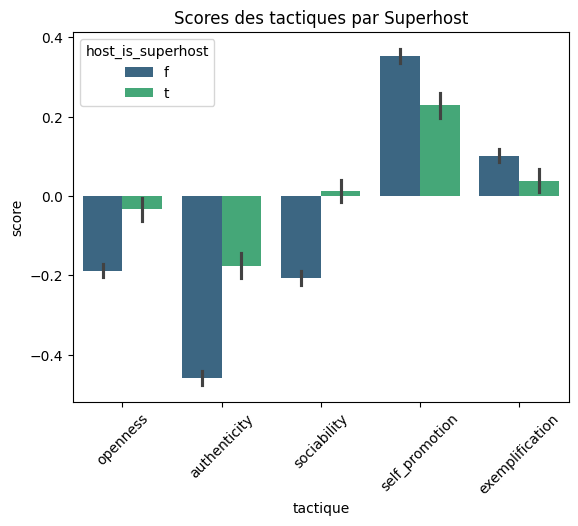

In [ ]:
data=listings[cols_tactics+['host_is_superhost']]
data=data[data['exemplification']!=0]
print(len(data))

##宽格式转换成从长格式，适合sns画图：
data_long=pd.melt(
    data,                # 要转换的数据表（DataFrame）
    id_vars='host_is_superhost',         # 不需要“熔化”的列（保留下来作为标识）
    value_vars=cols_tactics,      # 需要“熔化”的列（将被合并成长格式）
    var_name='tactique',        # 熔化后列名的名字（原来是列名的值）
    value_name='score'    # 熔化后数值列的名字（原来的单元格值）
)

sns.barplot(data_long, x='tactique', y='score', hue='host_is_superhost', palette='viridis')# hue='host_is_superhost'
plt.xticks(rotation=45)
plt.title('Scores des tactiques par Superhost')
plt.savefig("D:\Master_ENC\mini_memoire\self-presentation_airbnb\images/barplot_tactics_superhost.jpg",dpi=300)

<Axes: xlabel='tactique', ylabel='score'>

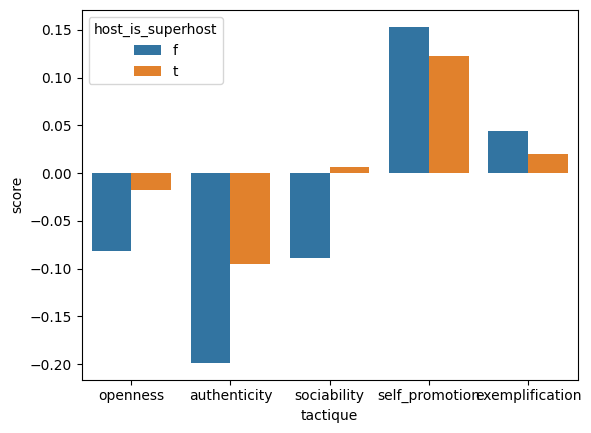

In [47]:
grouped_means = listings.groupby('host_is_superhost')[cols_tactics].mean().reset_index()
# print(grouped_means)
means_long=pd.melt(
    grouped_means,
    id_vars='host_is_superhost',
    value_vars=cols_tactics,
    var_name='tactique',
    value_name='score'
)
sns.barplot(means_long, x="tactique", y='score',hue="host_is_superhost")


## effet size:

In [38]:
## taille d'effet : cohen's d :
# 计算组间实际差异：小效应：0.2, 中等效应：0.5, 大效应：0.8

import numpy as np
from scipy import stats

def t_test(x,y,tactic):
    t_stat, p_val = stats.ttest_ind(x[tactic], y[tactic],equal_var=False)
    return t_stat, p_val

def cohens_d(x, y,tactic):
    nx, ny = len(x), len(y)
    pooled_std = np.sqrt(((nx - 1) * np.std(x[tactic], ddof=1) ** 2 + (ny - 1) * np.std(y[tactic], ddof=1) ** 2) / (nx + ny - 2))
    return (np.mean(x[tactic]) - np.mean(y[tactic])) / pooled_std


##GROUPED data:
data = listings[listings['host_is_superhost'] == 't']#*
data_ =listings[listings['host_is_superhost'] == 'f']#*

results = []
for tactic in cols_tactics:
    t_stat, p_val = t_test(data, data_, tactic)
    d = cohens_d(data, data_, tactic)
    mean1 = data[tactic].mean()
    mean2 = data_[tactic].mean()
    
    results.append({
        'Tactique': tactic,
        'Superhost (Mean)': mean1,
        'Non-Superhost (Mean)': mean2,
        "Cohen's d": round(d, 2),
        't': round(t_stat, 2),
        'p': round(p_val, 4),

    })

# 输出为 DataFrame
df_results = pd.DataFrame(results)
display(df_results)

,Tactique,Superhost (Mean),Non-Superhost (Mean),Cohen's d,t,p
0,openness,-0.017183,-0.081420,0.10,7.69,0.0000
1,authenticity,-0.094665,-0.198449,0.15,11.39,0.0000
2,sociability,0.006288,-0.089234,0.14,10.92,0.0000
3,self_promotion,0.122951,0.153281,-0.04,-3.36,0.0008
4,exemplification,0.020487,0.044127,-0.04,-2.80,0.0051


In [12]:
model3=smf.ols('booking_rate_l30d ~ C(langue_) + C(professional_host) + '
' yrs_experience + C(host_identity_verified)+ C(host_has_profile_pic)+ host_response_rate+'
' availability_30 + price_ + review_scores_rating+'
'C(host_location_category) + C(property_type_) + beds +bathrooms + C(instant_bookable)+'
'len + len_squared +  '
'C(host_is_superhost)*(openness + authenticity + sociability +self_promotion + exemplification )', data=listings).fit(cov_type="HC3")

print(model3.summary())

                            OLS Regression Results                            
Dep. Variable:      booking_rate_l30d   R-squared:                       0.153
Model:                            OLS   Adj. R-squared:                  0.152
Method:                 Least Squares   F-statistic:                     125.1
Date:                Tue, 13 May 2025   Prob (F-statistic):               0.00
Time:                        13:03:22   Log-Likelihood:                 8733.4
No. Observations:               37012   AIC:                        -1.740e+04
Df Residuals:                   36978   BIC:                        -1.711e+04
Df Model:                          33                                         
Covariance Type:                  HC3                                         
                                                coef    std err          z      P>|z|      [0.025      0.975]
----------------------------------------------------------------------------------------------------

In [37]:
def interaction_plot_advanced(tactic='openness', listings_=listings, mediator='host_is_superhost'):
    import pandas as pd
    import numpy as np
    import seaborn as sns
    import matplotlib.pyplot as plt
    import statsmodels.formula.api as smf

    # 数据准备
    listings = listings_.copy()
    listings[mediator] = listings[mediator].map({'f': 0, 't': 1})

    # 1. 拟合完整模型
    formula = ('booking_rate_l30d ~ C(langue_) + C(professional_host) + '
               'yrs_experience + C(host_identity_verified) + C(host_has_profile_pic) + host_response_rate + '
               'availability_30 + price_ + review_scores_rating + '
               'C(host_location_category) + C(property_type_) + beds + bathrooms + C(instant_bookable) + '
               'C(host_is_superhost)*(openness + authenticity + sociability + self_promotion + exemplification)')
    
    model = smf.ols(formula, data=listings).fit(cov_type="HC3")

    # 2. 构建预测数据
    tactic_range = np.linspace(listings[tactic].min(), listings[tactic].max(), 100)
    groups = [0, 1]  # 非superhost / superhost

    # 提取控制变量的“默认值”：数值型取均值，分类型取众数
    default_vals = {}
    for col in model.model.exog_names:
        if ':' in col or col == 'Intercept':
            continue
        var_name = col.split('[')[0].replace('C(', '').replace(')', '')
        if var_name in listings.columns:
            if listings[var_name].dtype == 'O' or listings[var_name].nunique() < 10:
                default_vals[var_name] = listings[var_name].mode()[0]
            else:
                default_vals[var_name] = listings[var_name].mean()

    # 只保留 formula 中真正的变量
    import re
    vars_in_formula = re.findall(r'[a-zA-Z_][a-zA-Z0-9_]*', formula)
    default_vals = {k: v for k, v in default_vals.items() if k in vars_in_formula}
    
    # 构造用于预测的数据框
    rows = []
    for g in groups:
        for val in tactic_range:
            row = default_vals.copy()
            row[tactic] = val
            row[mediator] = g
            rows.append(row)

    predict_df = pd.DataFrame(rows)

    # predict 时注意处理分类变量（和原数据保持一致）
    for col in predict_df.columns:
        if col in listings.columns and listings[col].dtype == 'O':
            predict_df[col] = predict_df[col].astype(listings[col].dtype)

    # 预测结果
    predict_df['predicted_booking_rate'] = model.predict(predict_df)

    # 加入置信区间
    preds = model.get_prediction(predict_df)
    pred_summary = preds.summary_frame(alpha=0.05)
    predict_df['ci_lower'] = pred_summary['mean_ci_lower']
    predict_df['ci_upper'] = pred_summary['mean_ci_upper']

    # 可视化
    plt.figure(figsize=(8, 6))
    for g in groups:
        group_df = predict_df[predict_df[mediator] == g]
        label = f'Superhost' if g == 1 else f'Non-superhost'
        plt.plot(group_df[tactic], group_df['predicted_booking_rate'], label=label)
        plt.fill_between(group_df[tactic], group_df['ci_lower'], group_df['ci_upper'], alpha=0.2)

    plt.xlabel(f'{tactic}')
    plt.ylabel('Taux de réservation prédit')
    plt.title(f"Figure d'interaction : {tactic} × {mediator} ")
    plt.legend()
    plt.tight_layout()
    # plt.show()


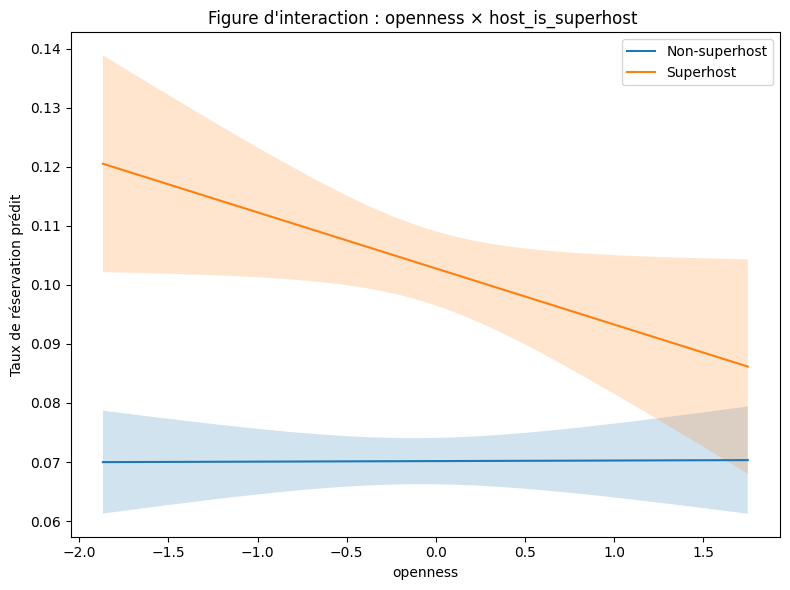

In [39]:
interaction_plot_advanced(tactic='openness')
plt.savefig("D:\Master_ENC\mini_memoire\self-presentation_airbnb\images/interaction_openness.jpg", dpi=300)

# sauvegarder:

In [ ]:
from statsmodels.iolib.summary2 import summary_col

results_table = summary_col([model1, model2, model3],
                            stars=True, 
                            float_format='%0.3f',
                            model_names=['Basic','Tactique','Superhôte'],
                            info_dict={'N': lambda x: f"{int(x.nobs)}",
                                       'R²': lambda x: f"{x.rsquared:.2f}"})

print(results_table)